# Import libraries and scripts
Various functions are imported from the graph module, which are used to visualize the raw and processed data sets in different ways for analysis and comparison. The graphics used correspond to box plots, scatter plots, heat maps and histograms. This notebook is essential to be able to have insights of the data in different ways and perform deep analysis.

In [1]:
import sys
sys.path.append(r'C:\Users\di_estebannn\Desktop\universidad\austria\applied_machine_and_deep_learning\project\src\scripts')
from graph import box_plot
from graph import scatter_plot
from graph import heat_map
from graph import histogram

import pandas as pd
import matplotlib.pyplot as plt
import os

# Import data
Data is loaded from CSV files corresponding to the total raw and processed data sets. Likewise, the general_path is initialized to have direct access to the project directory, as well as path_for_figures will allow direct access to the folder in which the different created graphs will be saved.

In [2]:
general_path = 'C:/Users/di_estebannn/Desktop/universidad/austria/applied_machine_and_deep_learning/project'
path_for_figures = os.path.join(general_path, 'results', 'figures')

df_raw_total = pd.read_csv(general_path + '/data/raw/normalized_total_data.csv')
df_processed_total = pd.read_csv(general_path + '/data/processed/processed_total_data.csv')

# Generate statistics to get insights of the data
## Statistics of the Training (training/testing) set and the Validation set
### Show statistics organized in tables
(Quantity, Mean, Standard Deviation, Minimums and Maximums and Quartiles)
It is evident that the data has already been scaled with minimum and maximum values between 0 and 1. However, no standardization was applied, since the mean is not 0 and the standard deviation is not 1.

In [3]:
stats_r_total = df_raw_total.describe()
stats_p_total = df_processed_total.describe()

print('Statistics of all raw data:')
print(stats_r_total) #.loc[['mean', 'std']]
print('Statistics of all processed data:')
print(stats_p_total) #.loc[['mean', 'std']]

Statistics of all raw data:
             output        input1        input2        input3        input4  \
count  10979.000000  10979.000000  10979.000000  10979.000000  10979.000000   
mean       0.490648      0.598005      0.805444      0.738342      0.432964   
std        0.092605      0.314494      0.103248      0.254428      0.116039   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.440000      0.250000      0.777344      0.375000      0.351421   
50%        0.502222      0.500000      0.833984      0.895210      0.471002   
75%        0.553299      1.000000      0.867188      0.925150      0.511424   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             input5        input6        input7        input8        input9  \
count  10979.000000  10979.000000  10979.000000  10979.000000  10979.000000   
mean       0.583840      0.391321      0.412284      0.679170      0.518248   
std        0.097405    

### Save statistics in csv files

In [4]:
r_t_stats_path = os.path.join(general_path, 'results', 'tables', 'statistics_of_raw_total_data.csv')
stats_r_total.to_csv(r_t_stats_path)

p_t_stats_path = os.path.join(general_path, 'results', 'tables', 'statistics_of_processed_total_data.csv')
stats_p_total.to_csv(p_t_stats_path)

# Data displayed through graphs
## Box Plots
Box plots are useful for visualizing the distribution and dispersion of a data set. They allow you to identify the median, quartiles and possible outliers in the data. They are especially useful for comparing the distribution of different variables or data sets.

### Box plots for the raw total data set
Too many outliers are displayed in most of the 21 entries in the raw data set. The only ones that do not present atypical values are inputs1, 3, 6 and 9.

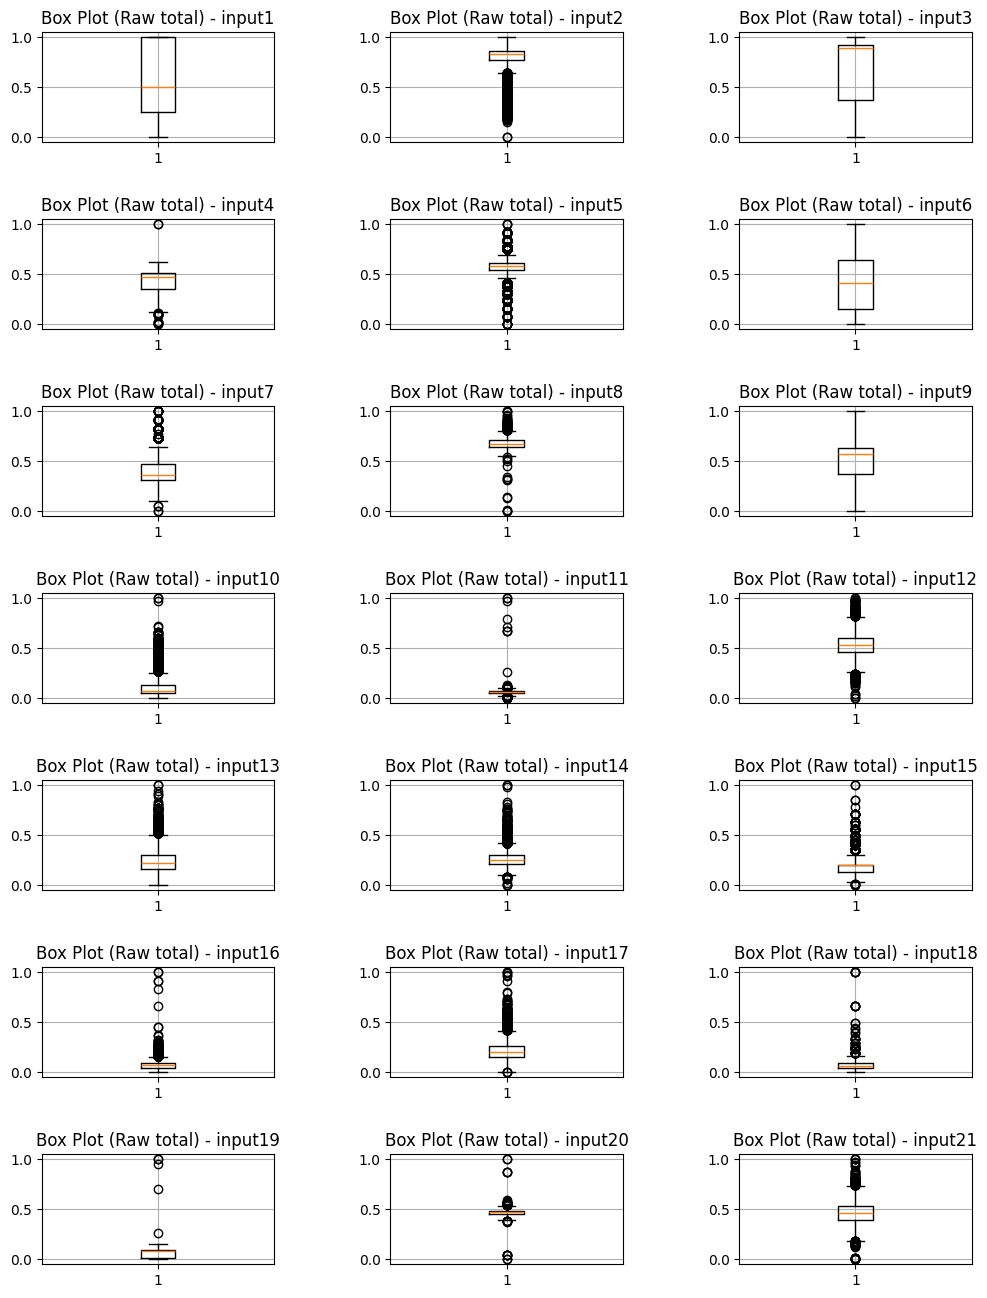

In [5]:
box_plot(df_raw_total, "Raw total", path_for_figures, 'box_plots_raw_t.png')

### Box plots for the processed total data set
Most entries significantly improved the outlier problem they had. However, they continue to present atypical values that fall outside the interquartile range. Nevertheless, it was decided to establish a limit for removing outliers of 10%, and currently 1093 rows of data have already been removed, corresponding to 9.955% of the total database. Therefore, the removal of outliers was not continued.

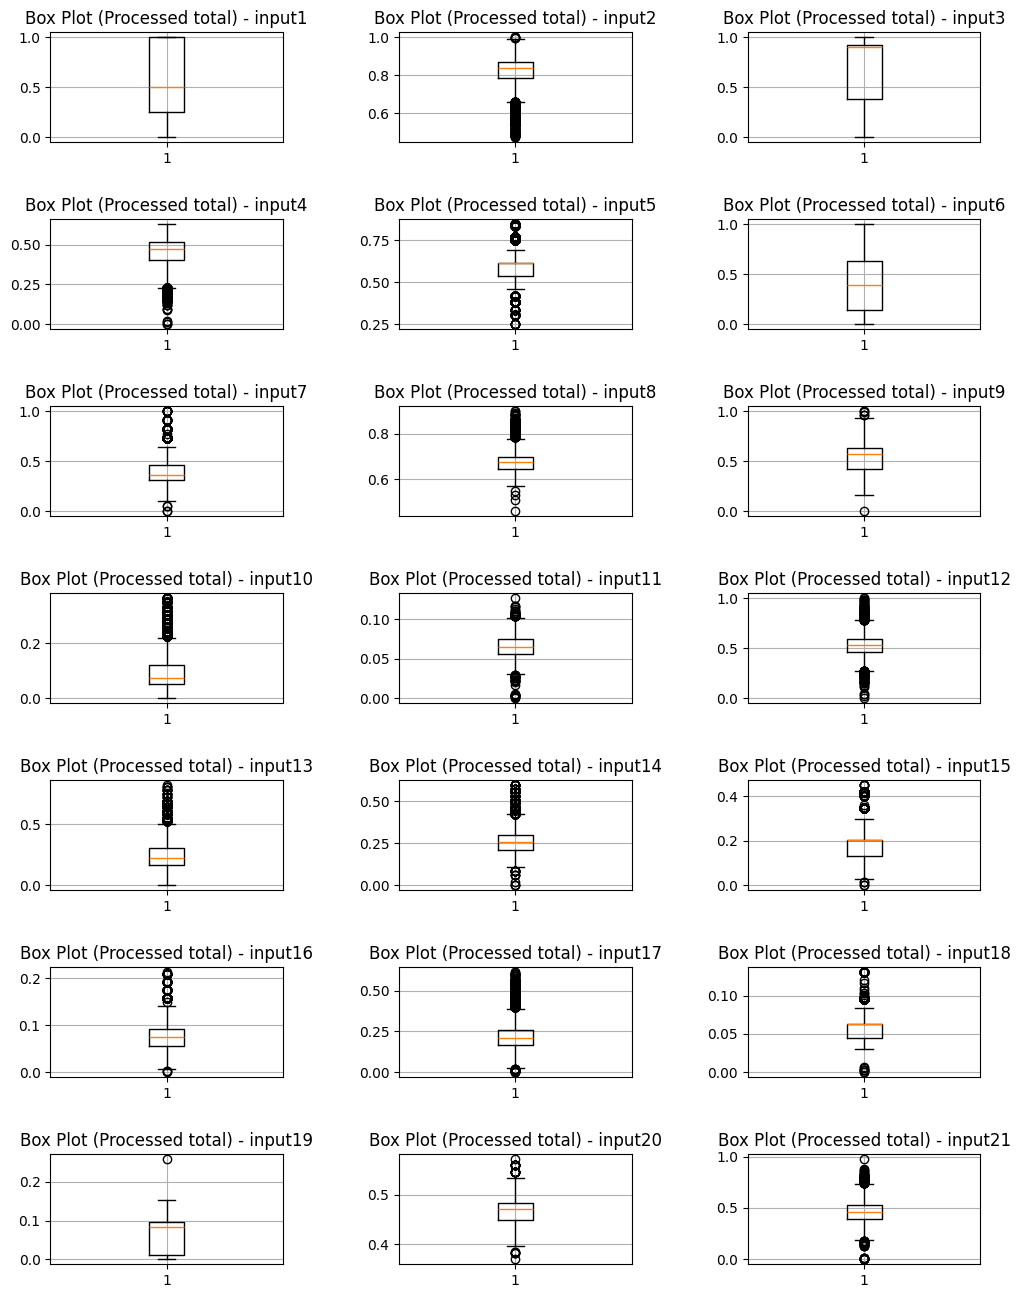

In [6]:
box_plot(df_processed_total, "Processed total", path_for_figures, 'box_plots_processed_t.png')

## Scatter plots
Scatter plots are essential to visualize the relationship between two variables. Each point on the graph represents an observation and its position on the X and Y axes shows how both variables change together. They are useful for identifying patterns, trends, and linear or nonlinear relationships between variables.

### Scatter plots for the raw total data set (just inputs)
It is seen the distribution of the data corresponding to the 21 inputs. In inputs with lower standard deviation, such as number 19, the outliers are quite evident, while in others such as number 3, the outliers are not very clear and the interquartile range does not apply, since the data is distributed in 2 groups. Therefore, continuing to remove outliers would have eliminate the bottom grouping of data visible in the graph.

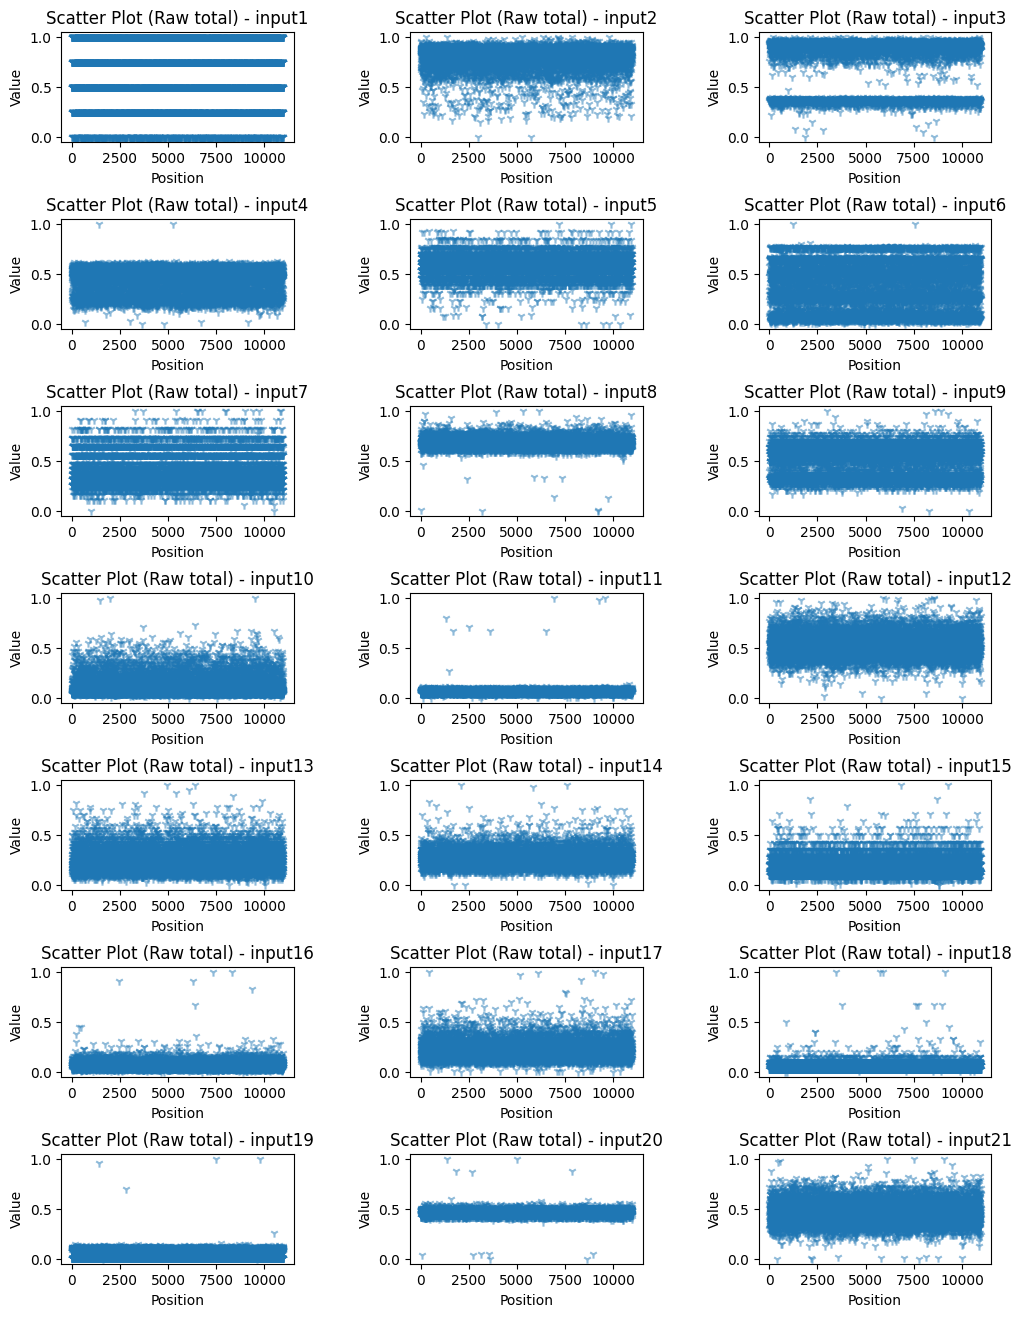

In [7]:
scatter_plot(df_raw_total, "Raw total", path_for_figures, 'scatter_plots_raw_t.png')

### Scatter plots for the processed total data set (just inputs)
The process of eliminating outliers allowed most of the data to be preserved and, at the same time, eliminate outliers that could influence the training of models with different Machine Learning algorithms.

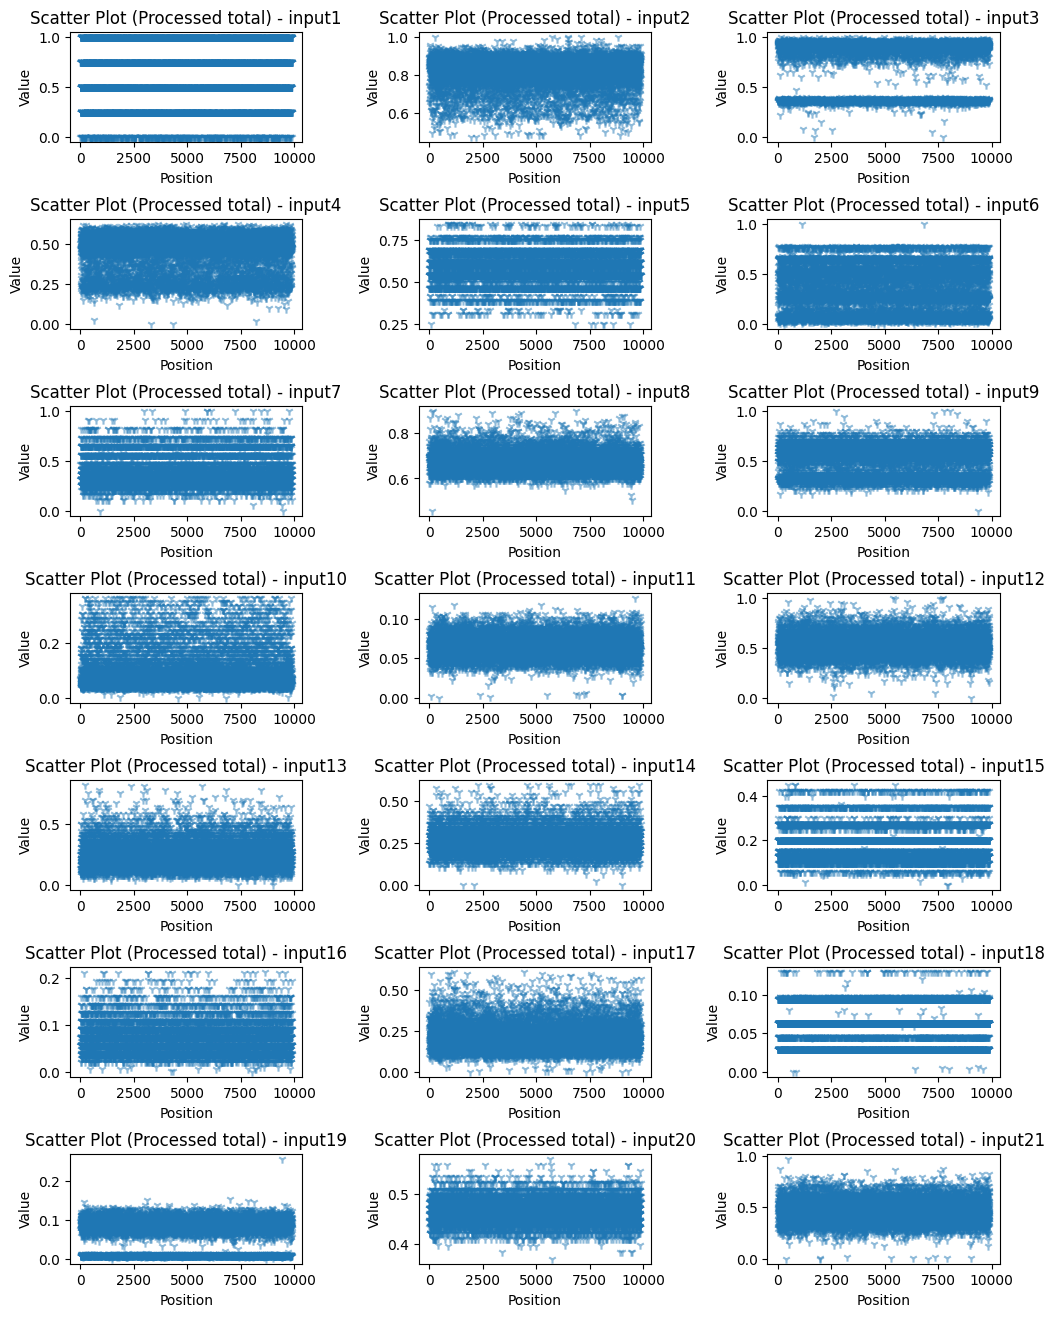

In [8]:
scatter_plot(df_processed_total, "Processed total", path_for_figures, 'scatter_plots_processed_t.png')

### Scatter plots for the raw total data set (inputs and output)
It can be seen the relationship between the value of each input (on the x-axis) with the output (the y-axis). While some inputs do not seem to show a great relationship with the output, since the slope of the relationship (the red line) is close to 0 (as in the case of input 1), others seem to have a very defined relationship. However, this may change, because the graphs displayed here are before data preprocessing.

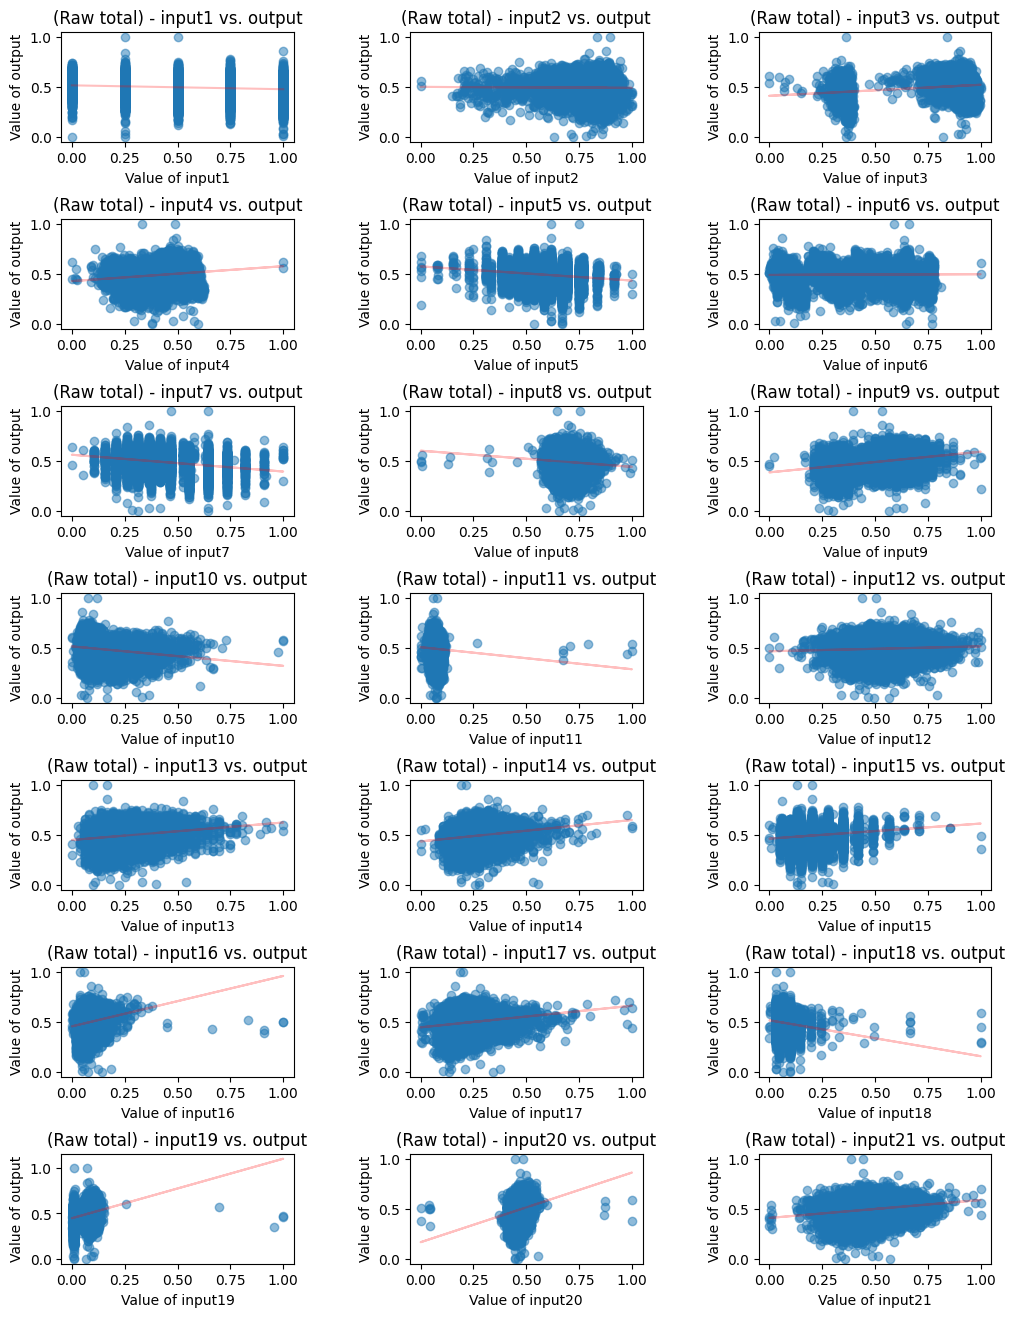

In [11]:
scatter_plot(df_raw_total, "Raw total", path_for_figures, 'scatter_plots_regression_raw.png', True)

### Scatter plots for the processed total data set (inputs and output)
Indeed, after the elimination of outliers, all relationships between inputs and output changed a bit.

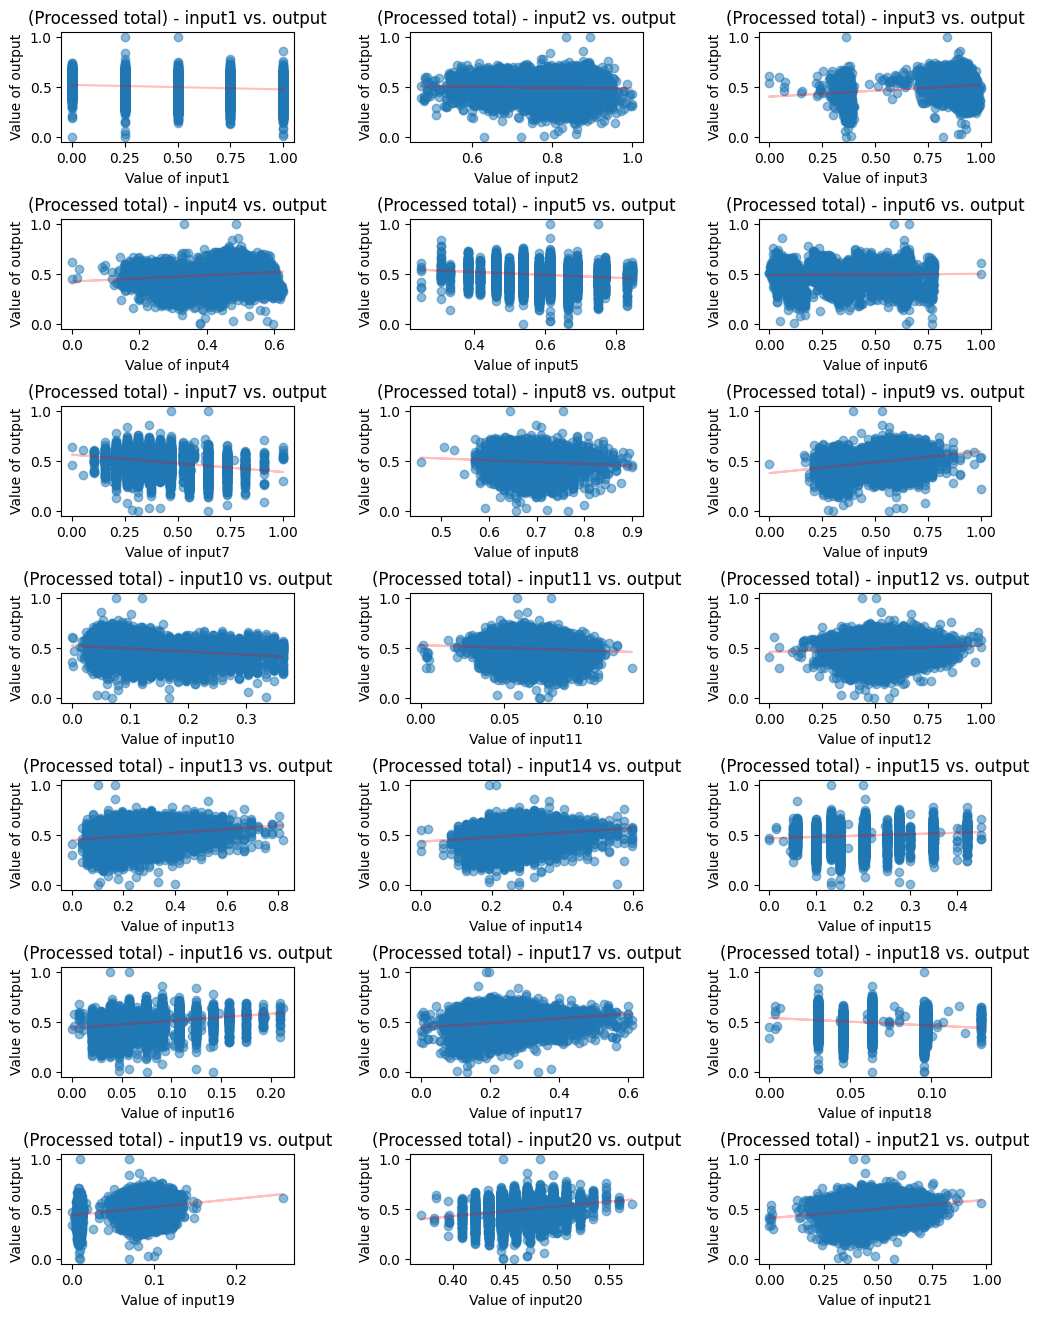

In [12]:
scatter_plot(df_processed_total, "Processed total", path_for_figures, 'scatter_plots_regression_processed.png', True)

## Heat maps
Heat maps are used to visualize the correlation between different variables in a matrix. The colors on the map represent the degree of correlation, making it easy to identify patterns and relationships between variables. They are particularly useful in data analysis and predictive modeling.

### Heat maps of correlation for the raw total data set
Thanks to the heat map, it is clear that the output does not present strong relationships with any of the inputs, while some inputs present strong relationships with each other.

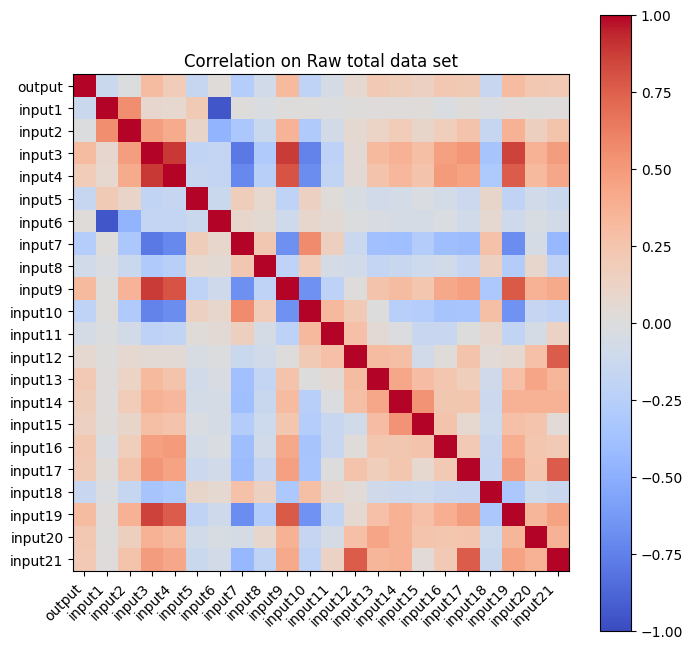

In [9]:
heat_map(df_raw_total, "Raw total", path_for_figures, 'heat_maps_raw_t.png')

### Heat maps of correlation for the processed total data set
From what can be seen, the relationship between variables did not change much after data preprocessing. However, it is still useful to avoid problems with the training of machine learning models and, in addition, the heat map can also serve as a basis for making decisions related to the selection of features, as in the case of inputs 1 and 6, which are the ones that seem to have the least relationship with the majority of variables.

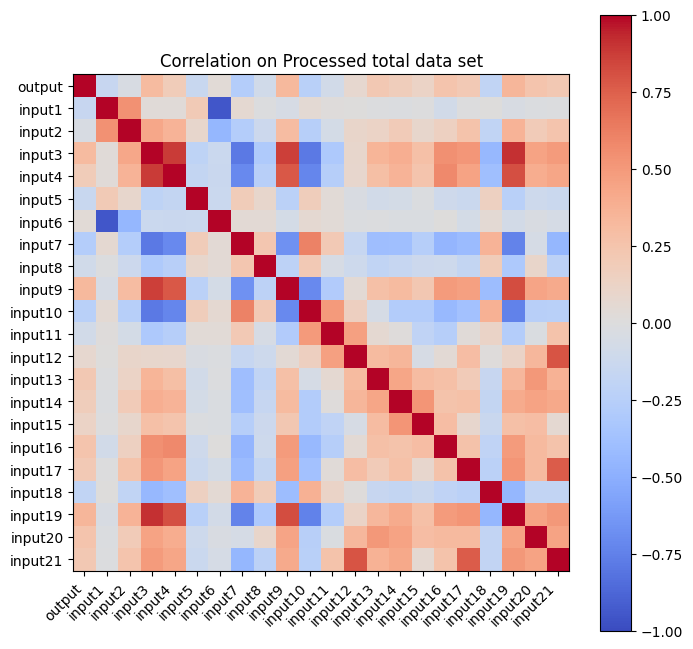

In [10]:
heat_map(df_processed_total, "Processed total", path_for_figures, 'heat_maps_processed_t.png')

## Histograms
Histograms provide a visual representation of the distribution of a numerical variable. They show how frequently different ranges of values appear in a data set. Histograms are essential for understanding the shape of the distribution, identifying skews, and evaluating the normality of the data.

### Histograms for the raw total data set (inputs and output)
In the graphs it can be seen the distribution of values that each input and output have, being located between half of the values and having a distribution similar to the normal one.

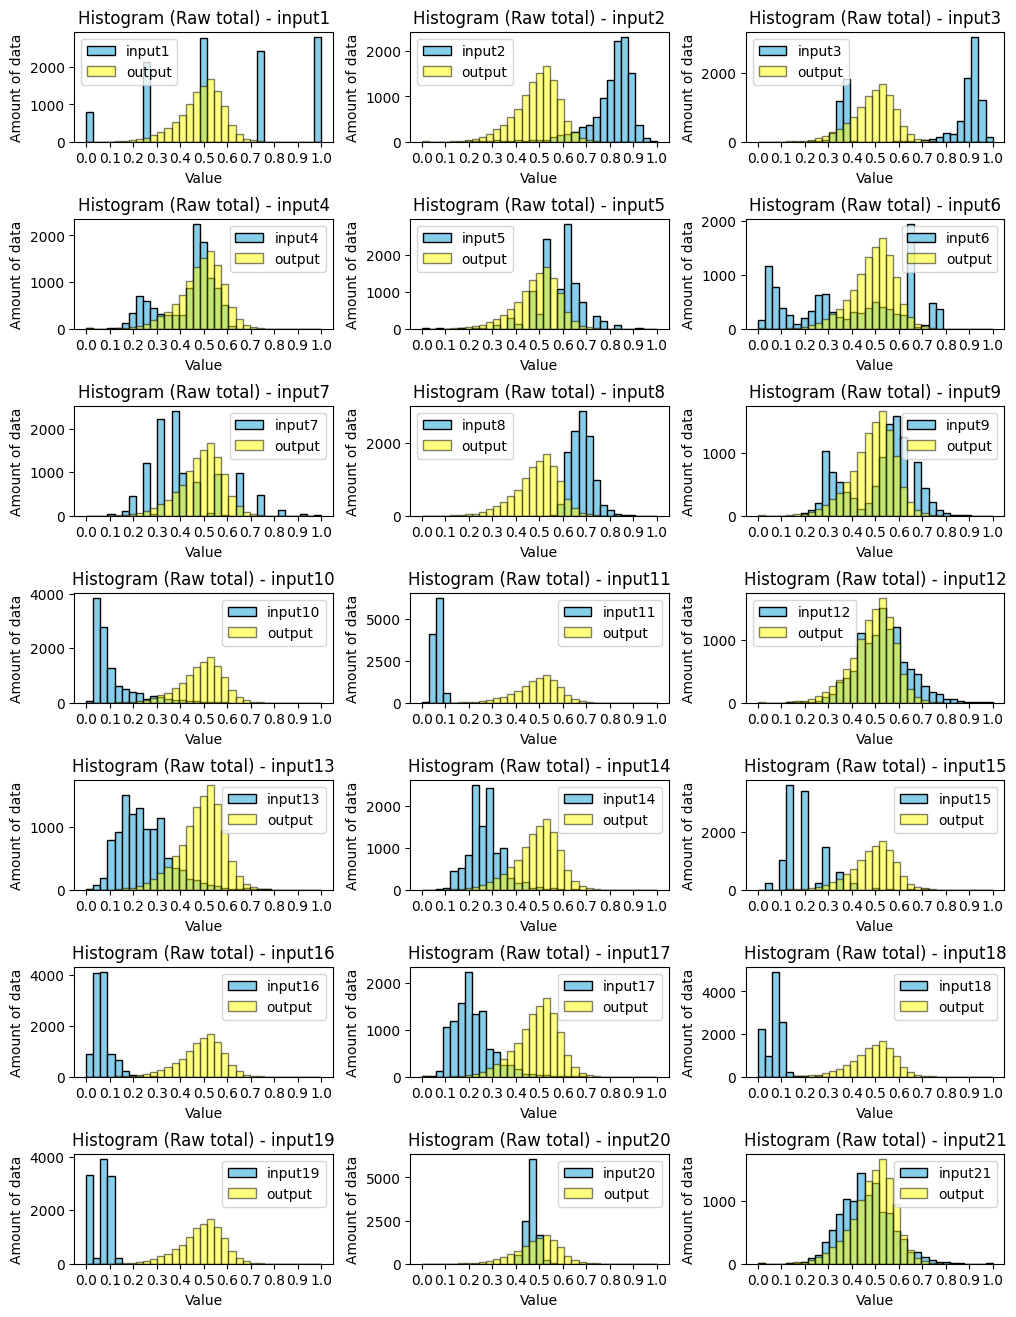

In [13]:
histogram(df_raw_total, "Raw total", path_for_figures, 'histograms_raw_t.png')

### Histograms for the processed total data set (inputs and output)
The histograms of the processed data are quite similar to those of the unprocessed data, since in reality the raw data for this project had already been cleaned and processed to some extent (scaled with minimum and maximum values between 0 and 1 and without null values) . Although the raw data still had outliers and the processed one does not have, they are difficult to visualize on a histogram, since that is not the function of this type of graph.

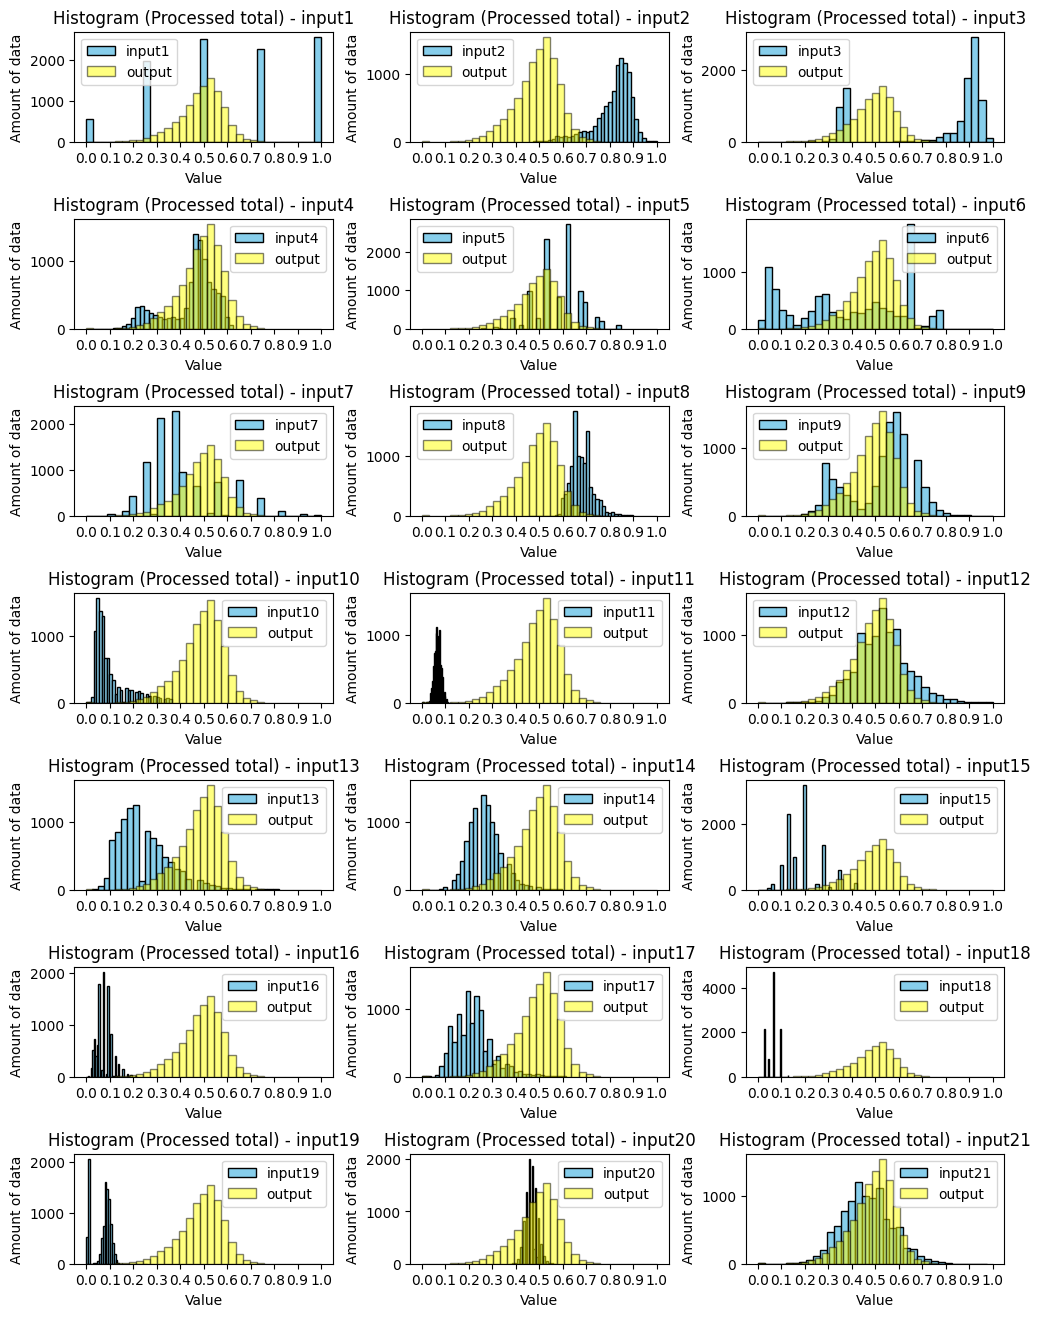

In [14]:
histogram(df_processed_total, "Processed total", path_for_figures, 'histograms_processed_t.png')